<div style="float:left">
    <h1 style="width:600px">CASA Practical 4 Part 1: Neural networks using fastai</h1>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

# Introduction

In this workshop, we'll see how fast.ai allows you to use the same API to solve a range of deep learning problems with unstructured data, such as vision. We'll go over a lot of different tasks and each time, grab some data in a [`DataBunch`](https://docs.fast.ai/basic_data.html#DataBunch) with the [data block API](https://docs.fast.ai/data_block.html), see how to get a look at a few inputs with the `show_batch` method, train an appropriate [`Learner`](https://docs.fast.ai/basic_train.html#Learner) then use the `show_results` method to see what the outputs of our model actually look like.

The fast.ai library is developed by the fast.ai, a non-profit research group focused on deep learning and artificial intelligence. It was founded by by Jeremy Howard and Rachel Thomas with the goal of *democratising deep learning* in 2016. The group do this in several ways:

- Free courses for coders: the free Massive Open Online Course (MOCC) "Practical Deep Learning for Coders".
- Easy-to-use software library: fast.ai library, which is based on the PyTorch framework.
- Cutting-edge research
- Community

The slogan of fast.ai is *Making neural nets uncool again*. More details are [here](https://www.fast.ai/about/):

```
Being cool is about being exclusive, and that’s the opposite of what we want. We want to make deep learning as accessible as possible– including to people using uncool languages like C#, uncool operating systems like Windows (which is used by the majority of the world), uncool datasets (way smaller than anything at Google, and in domain areas you’d consider obscure), and with uncool backgrounds (maybe you didn’t go to Stanford).
```


A few facts about fast.ai:
* It is an easy to use deep learning library in Python
* It is built on top of PyTorch, one of the most popular deep learning frameworks developed by Facebook
* fast.ai also comes with a [free deep learning crash course](https://course.fast.ai/) which you might want to explore afterwards!
* fast.ai is one of the **four** most popular deep learning frameworks shown below.

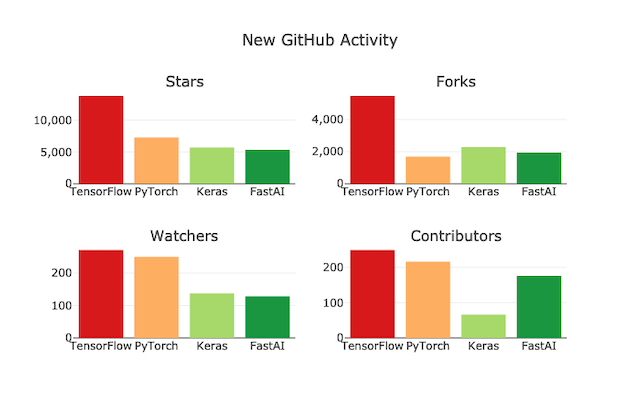

Fast.ai contain separate modules for different types of data: *vision*, *text* or *tabular*. Each module is a set of ready-to-use functions to load data, select a suitable model and train the model. For more information, read the documentation [here](https://fastai1.fast.ai/applications.html).

Note that you need Internet to download datasets when running this workshop.

The fast.ai library (version 1.0.61) has been installed in the SDS Docker environment.

If you are using other Python environments than the SDS Docker, please install the fast.ai library according to the instructions [here](https://github.com/fastai/fastai/blob/master/README.md#installation). 

If you are using Conda, you should simply run the following command in your terminal (note that you need to replace *your_env_name* with your own environment): 

```
    conda activate [your_env_name, e.g. sds2021]
    pip install --no-cache-dir fastai==1.*
```

These commands may activate your environment, and then install fastai (version 1.0.61 or similar) while updating a list of other packages. Type 'y' to proceed if you are asked 'Proceed?\[y/n\]'.

Please make sure that you are using fastai v1 for this workshop. The APIs of fastai have changed dramatically between v1 and v2 (the current version).

The documentation of fastai 1.* is [here](https://fastai1.fast.ai/).

If you want to learn more about fastai, you can attend the online course [Practical Deep Learning for Coders](https://course.fast.ai/).

After the installation, you may check the installed version of **fastai** in the terminal using the following command (for Linux/Mac/WLS):

```
conda list | grep fastai
```

If you are using Windows cmd, an alternative command would be:
```
conda list | findstr fastai
```

The version should be 1.\*. If you have installed v2, please rerun the installation command to get v1.

In [ ]:
#! pip install fastai==1.0.61

In [1]:
from fastai.basics import *
from fastai.gen_doc.nbdoc import *
# defaults.device = torch.device('cpu')

/home/huanfa/miniconda3/envs/sds2021/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# another way to check the version of fastai
import fastai
fastai.__version__

'1.0.61'

## Vision

To quickly get access to all the vision functions inside fastai, we use the usual import statements.

In [3]:
from fastai.vision import *

### Image classification

Let's begin with our sample of the [MNIST_TINY](http://yann.lecun.com/exdb/mnist/) dataset. 

We use the `untar_data` to download data and the `get_transforms` to create a list of flip, rotate, zoom, warp, lighting transforms on the images.

These transformations are common for images in order to avoid overfitting and build models with good generalisation.

![](https://www.onlinemathlearning.com/image-files/flip-slide-turn.png)


In [4]:
mnist = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

Print the value of URLs.MNIST_TINY to see where the data is downloaded from.

In [5]:
print(URLs.MNIST_TINY + '.tgz')

http://files.fast.ai/data/examples/mnist_tiny.tgz


Check where the data is saved in the local computer.

In [6]:
mnist

PosixPath('/home/huanfa/.fastai/data/mnist_tiny')

Check which files have been downloaded.

In [7]:
mnist.ls()

[PosixPath('/home/huanfa/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/huanfa/.fastai/data/mnist_tiny/models'),
 PosixPath('/home/huanfa/.fastai/data/mnist_tiny/test'),
 PosixPath('/home/huanfa/.fastai/data/mnist_tiny/train'),
 PosixPath('/home/huanfa/.fastai/data/mnist_tiny/valid')]

The dataset is set up with an ImageNet structure so we use it to load our training and validation datasets, then label, transform, convert them into ImageDataBunch and finally, normalize them.

What is [ImageNet](https://image-net.org/)? It is an image database, in which each node of the hierarchy is depicted by hundreds and thousands of images. The project has been instrumental in advancing computer vision and deep learning research. The data is available for free to researchers for non-commercial use.

Here we create the `data` object by loading, merging, and manipulating the mnist data.

1. **from_folder**: create an ItemList in **path** from the filenames
1. **split_by_folder**: split the data depending on the folder (train or valid) where the filenames are.
1. **label_from_folder**: give a label to each filename depending on its folder.
1. **transform**: apply transformation to the X of the train and validation set.
1. **databunch**: create an DataBunch by merging all datasets.
1. **normalize**: normalize the training and testing data.

The output data is in a format of `DataBunch`.

In [8]:
data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        # .transform(tfms, size=32)
        .databunch(num_workers=0)
        .normalize(imagenet_stats))

The `data` object contains a list of training and testing data (including x and y). 

In [9]:
data.label_list

LabelLists;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /home/huanfa/.fastai/data/mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /home/huanfa/.fastai/data/mnist_tiny;

Test: None

Once your data is properly set up in a [`DataBunch`](/basic_data.html#DataBunch), we can call `data.show_batch()` to see what a sample of a batch looks like.

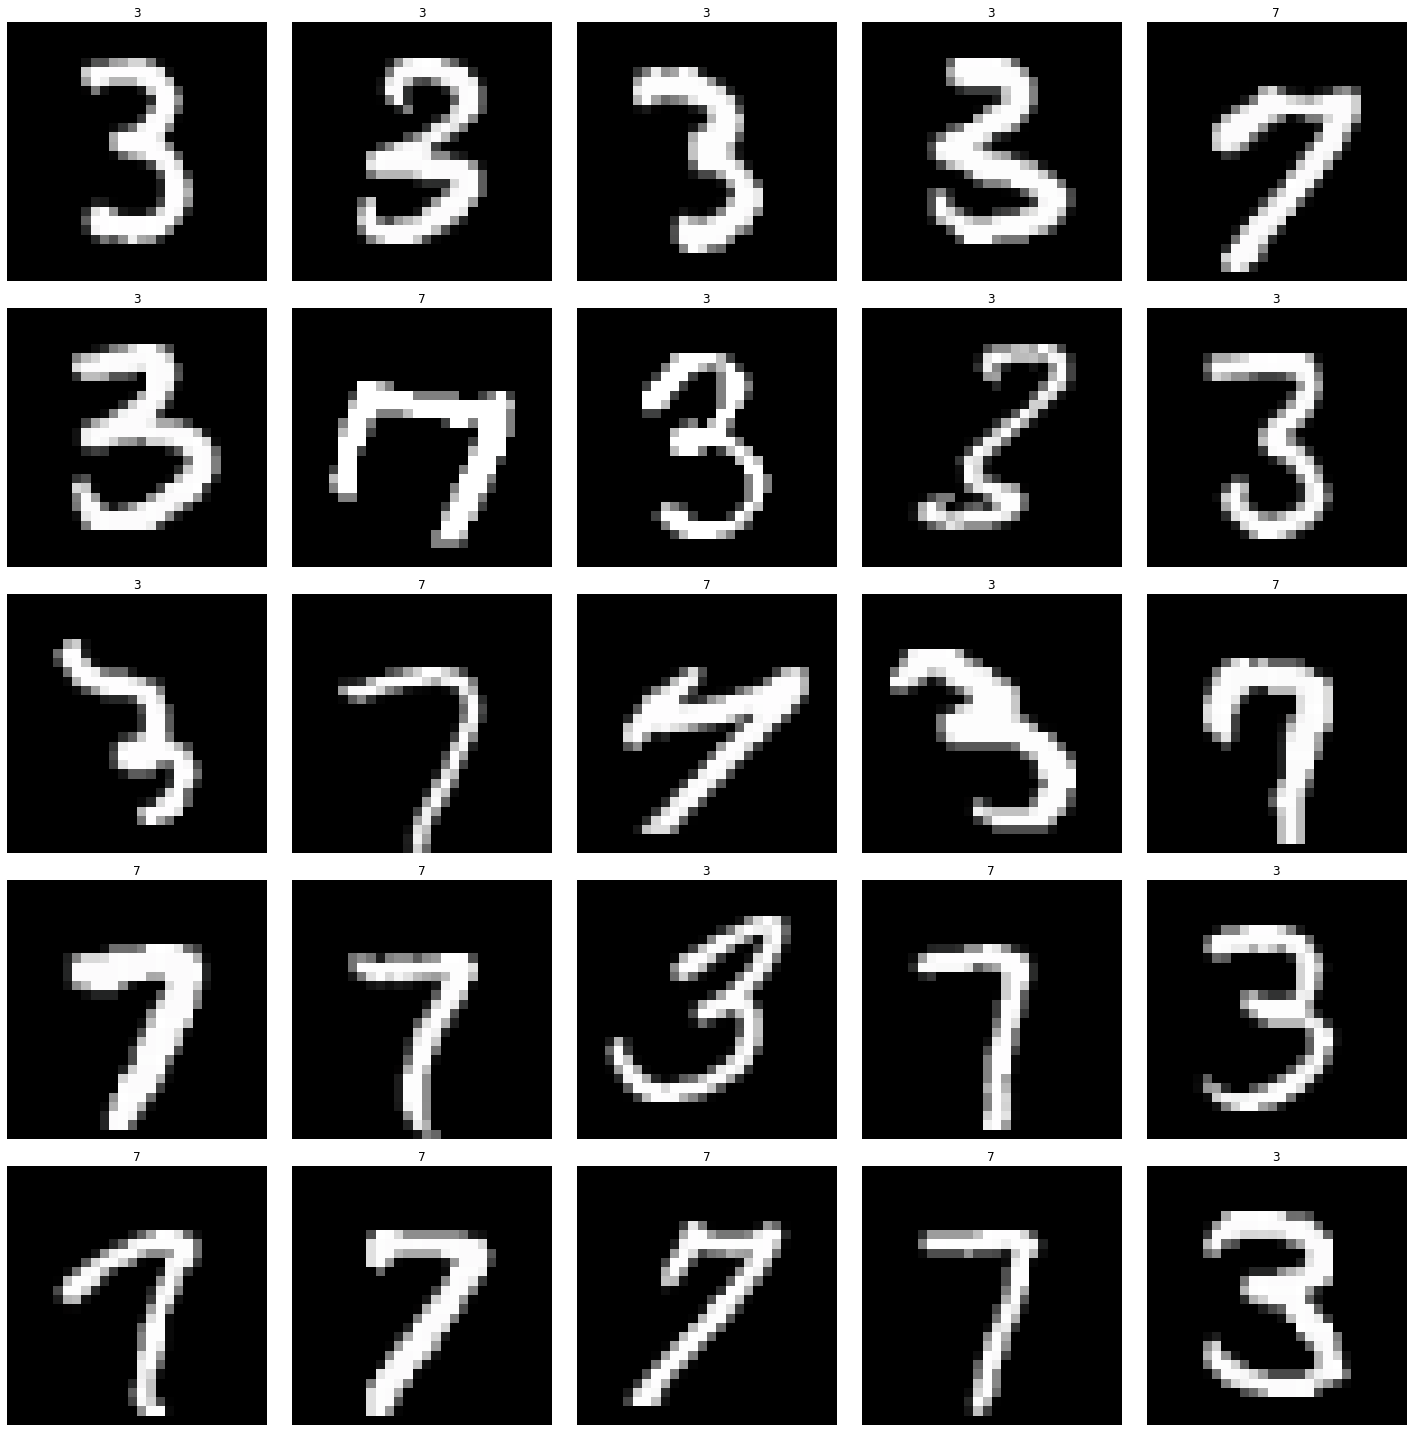

In [10]:
data.show_batch()

Note that the images were automatically de-normalized before being showed with their labels (inferred from the names of the folder). We can specify a number of rows if the default of 5 is too big, and we can also limit the size of the figure.

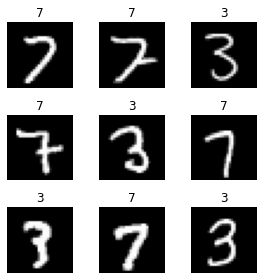

In [11]:
data.show_batch(rows=3, figsize=(4,4))

Now let's create a [`Learner`](https://docs.fast.ai/vision.learner.html) object to train a classifier.

Here, we use a pretrained CNN model called **resnet18**. It is a classical CNN model. We download the pretrained model and retrain this model on our dataset as training this model from scratch is time-consuming and computationally expensive.

The structure of this model is as follows. It contains 18 layers, including fully connected, convolutional, and pooling layers.

![](https://www.researchgate.net/publication/336642248/figure/fig1/AS:839151377203201@1577080687133/Original-ResNet-18-Architecture_W640.jpg)

We will get the pretrained resnet18 model using **cnn_learner**. This method helps automatically get a pretrained model from a given architecture with a custom head that is suitable for your data.

Then, we will retrain this model using **fit_one_cycle**. This function trains the model for n_epoch (i.e. number of iterations) using the 1cycle policy.

Details about this function is [here](https://docs.fast.ai/callback.schedule.html#Learner.fit_one_cycle).

In [12]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
# learn.fit_one_cycle(n_epoch=1,lr_max=1e-2)
learn.fit_one_cycle(cyc_len=50,max_lr=1e-2)
learn.save('mini_train')

/home/huanfa/miniconda3/envs/sds2021/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/huanfa/miniconda3/envs/sds2021/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/huanfa/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:04<00:00, 10.0MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.721445,0.381797,0.836910,00:03
1,0.558438,0.260105,0.889843,00:03
2,0.435388,0.195637,0.922747,00:03
3,0.340614,0.149931,0.944206,00:02
4,0.268853,0.118981,0.962804,00:03
5,0.211011,0.117891,0.964235,00:04
6,0.168863,0.119221,0.962804,00:03
7,0.141144,0.106498,0.974249,00:02
8,0.118127,0.104237,0.977110,00:02
9,0.104087,0.232557,0.947067,00:02


Our model has quickly reached around 88% accuracy, now let's see its predictions on a sample of the validation set. For this, we use the `show_results` method.

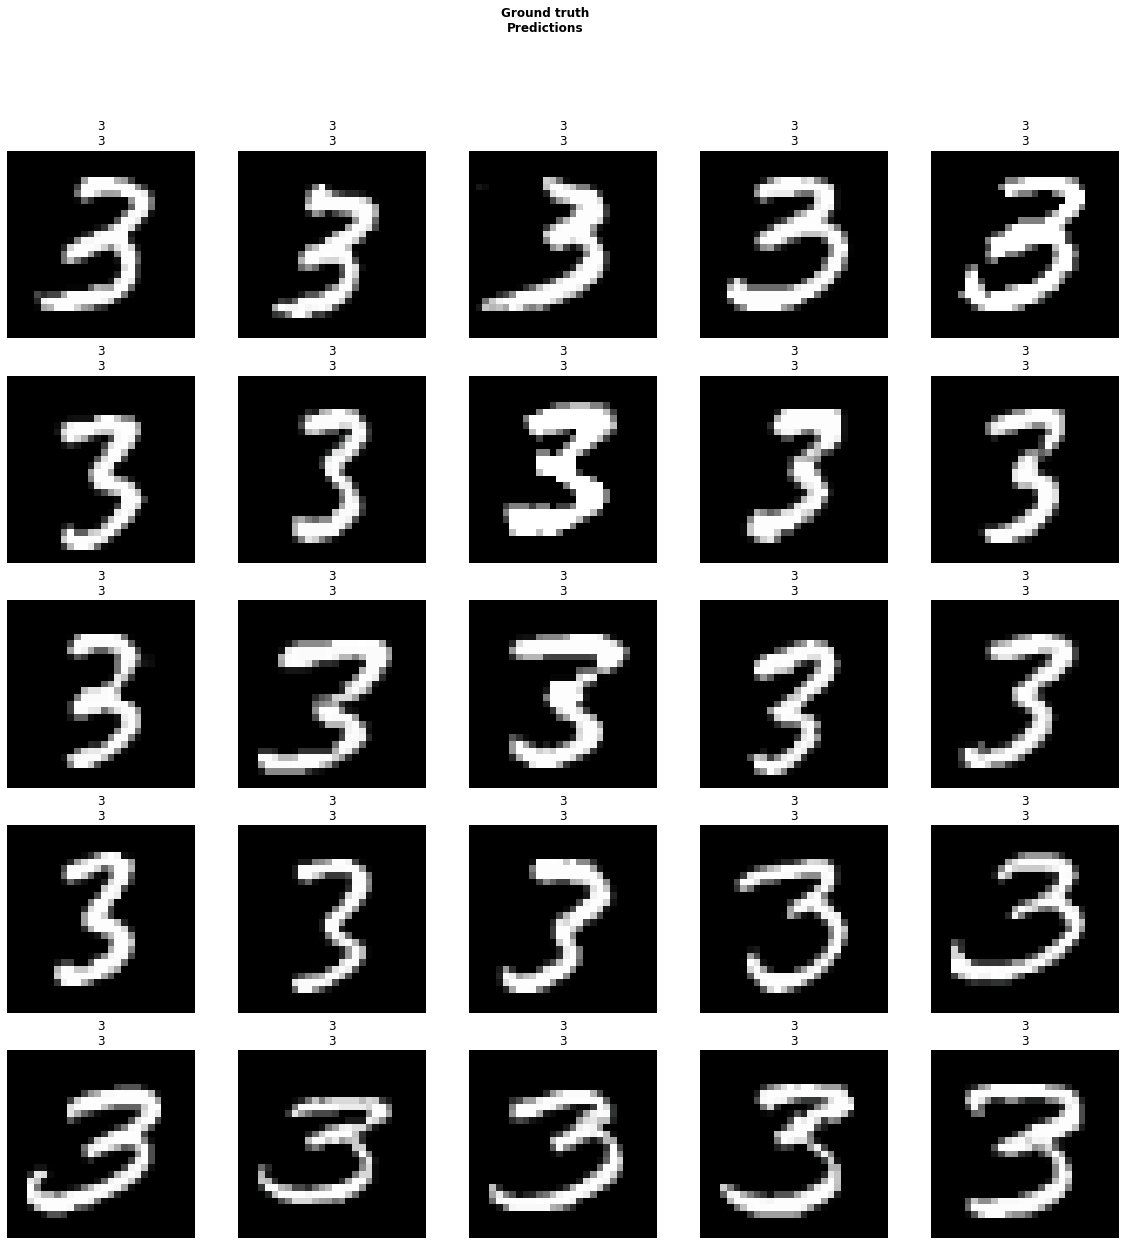

In [13]:
learn.show_results()

Since the validation set is usually sorted, we get only images belonging to the same class. We can then again specify a number of rows, a figure size, but also the dataset on which we want to make predictions.

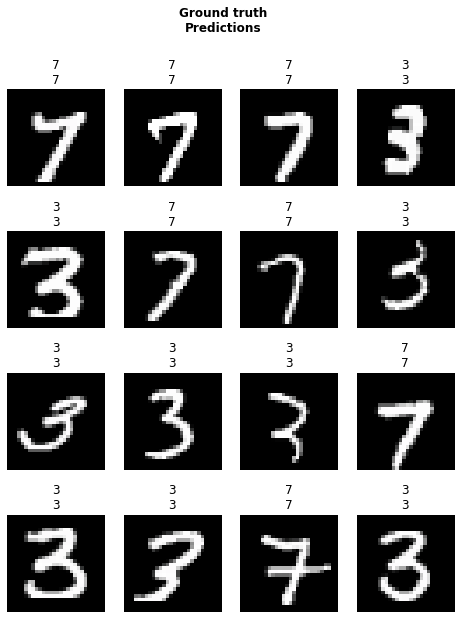

In [14]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))

### A multilabel problem

Now let's try these on the PLANET_TINY dataset. It is a tiny version of the planets dataset from the [Kaggle competition Planet: Understanding the Amazon from Space](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space) for faster experimentation and prototyping.

The study area is the Amazon basin:

![](https://storage.googleapis.com/kaggle-competitions/kaggle/6322/media/Amazonriverbasin_basemap.png)

The task is to label satellite image chips with atmospheric conditions and 12 classes of land cover/land use, which is as follows:

![](https://storage.googleapis.com/kaggle-competitions/kaggle/6322/media/chips.jpg)

This is a multilabel problem, as each image may contain one or more classes of land cover.

In [15]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

Here each images is labelled in a file named 'labels.csv'. We have to add 'train' as a prefix to the filenames, '.jpg' as a suffix and the labels are separated by spaces.

In [16]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(label_delim=' ')
        .transform(planet_tfms, size=128)
        .databunch(num_workers=0)
        .normalize(imagenet_stats))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (160,) + inhomogeneous part.

You can print the **label_list** to see the training and validation set of X and y.

Here, the training and validation set contains 160 and 40 images, respectively. 

The x is a Image (3,128,128) and the y is a MultiCategory, e.g. "primary,partly_cloudy", which means that this image contains two types of land use - primary AND partly_cloudy.

In [ ]:
data.label_list

And we can have look at our data with `data.show_batch`.

In [ ]:
data.show_batch(rows=2, figsize=(9,7))

Then we can then create a [`Learner`](/basic_train.html#Learner) object pretty easily and train it for a little bit.

In [ ]:
learn = cnn_learner(data, models.resnet18)
learn.fit_one_cycle(5,1e-2)
learn.save('mini_train')

And to see actual predictions, we just have to run `learn.show_results()`.

In [ ]:
learn.show_results(rows=2, max_n=6, figsize=(15,15))

### Face recognition (a regression example)

For the next example, we are going to use the [BIWI head pose](https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db) dataset. On pictures of persons, we have to find the center of their face. For the fastai docs, we have built a small subsample of the dataset (200 images) and prepared a dictionary for the correspondance filename to center.

In [ ]:
biwi = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = pickle.load(open(biwi/'centers.pkl', 'rb'))

To grab our data, we use this dictionary to label our items. We also use the [`PointsItemList`](/vision.data.html#PointsItemList) class to have the targets be of type [`ImagePoints`](/vision.image.html#ImagePoints) (which will make sure the data augmentation is properly applied to them). When calling [`transform`](/tabular.transform.html#tabular.transform) we make sure to set `tfm_y=True`.

In [ ]:
data = (PointsItemList.from_folder(biwi)
        .split_by_rand_pct(seed=42)
        .label_from_func(lambda o:fn2ctr[o.name])
        # .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch(num_workers=0)
        .normalize(imagenet_stats))

Then we can have a first look at our data with `data.show_batch()`.

In [ ]:
data.show_batch(rows=3, figsize=(9,6))

We train our model for a little bit before using `learn.show_results()`.

In [ ]:
learn = cnn_learner(data, models.resnet18, lin_ftrs=[100], ps=0.05)
learn.fit_one_cycle(10, 5e-2)
learn.save('mini_train')

In [ ]:
learn.show_results(rows=3)

It looks like the face recognition is not very accurate. To improve it, you can try increase the number of cycles of the **fit_one_cycle** function.

### Image segmentation

Now we are going to look at the [camvid dataset](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/), where we have to predict the class of each pixel in an image. Each image in the 'images' subfolder as an equivalent in 'labels' that is its segmentations mask.

In [ ]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'

We read the classes in 'codes.txt' and the function maps each image filename with its corresponding mask filename.

In [ ]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str)
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

The data block API allows us to uickly get everything in a [`DataBunch`](/basic_data.html#DataBunch) and then we can have a look with `show_batch`.

In [ ]:
data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        # .transform(get_transforms(), tfm_y=True, size=128)
        .databunch(bs=16, path=camvid, num_workers=0)
        .normalize(imagenet_stats))

In [ ]:
data.show_batch(rows=2, figsize=(7,5))

Then we train a Unet for a few epochs.

In [ ]:
learn = unet_learner(data, models.resnet18)
learn.fit_one_cycle(3,1e-2)
learn.save('mini_train')

In [ ]:
learn.show_results()

So - what do you think about the above prediction? What types of objects are not accurately identified?

## Now try to train a classifier on your own data

As the final task, we ask you to train your own image classifier. All you need to do is to create your own dataset with images. The dataset should have the structure described in [this post](https://forums.fast.ai/t/how-to-use-your-own-dataset-for-lesson-1/14195). Once you create the dataset, follow the same steps as in the MNIST classification example above, but with your own path to folder, i.e.:

```
data = (ImageList.from_folder(**your_path_to_folder**)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch(num_workers=0)
        .normalize(imagenet_stats))
```

# References

- [Practical Deep Learning for Coders *by fastai*](https://course.fast.ai/)
- [Deep Learning Specialisation *by DeepLearning.AI on Coursera*](https://www.coursera.org/learn/neural-networks-deep-learning/home/).
- [AI for Everyone *by Coursera*](https://www.coursera.org/learn/ai-for-everyone)
